# Importing the Data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/spam.csv", encoding="latin-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# dropping the unnecessary columns
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(10)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df.shape

(5572, 2)

In [5]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

* Spam = 1
* Ham = 0

In [6]:
for i in range(0,5572):
    if df['target'][i]=="spam":
        df['target'][i]= 1
    else:
        df['target'][i]= 0

df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [7]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

Sample of the Data

In [8]:
df.sample(10)

,target,text
5544,0,"I'm taking derek &amp; taylor to walmart, if I..."
1797,0,Can i get your opinion on something first?
2851,0,how tall are you princess?
5533,0,"Hey chief, can you give me a bell when you get..."
2674,0,I am 6 ft. We will be a good combination!
5122,0,\NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 ...
1220,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...
525,0,Hi i won't b ard 4 christmas. But do enjoy n m...
4972,0,Oops I was in the shower when u called. Hey a ...
2156,0,Hey cutie. How goes it? Here in WALES its kind...


# Exploratory Data Analysis

In [9]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:")
    print(dict(df.isnull().sum()))
    print("\nUnique values:")
    print(dict(df.nunique()))

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  5572

Number of features: 2

Data Features:
['target', 'text']

Missing values:
{'target': 0, 'text': 0}

Unique values:
{'target': 2, 'text': 5169}


Features having the Missing values

In [10]:
for key,value in dict(df.isnull().sum()).items():
  if(value > 0):
    print(key, " ---> ", value)
  else:
    print(key, ' have No null values')

target  have No null values
text  have No null values


Dropping duplicate values

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

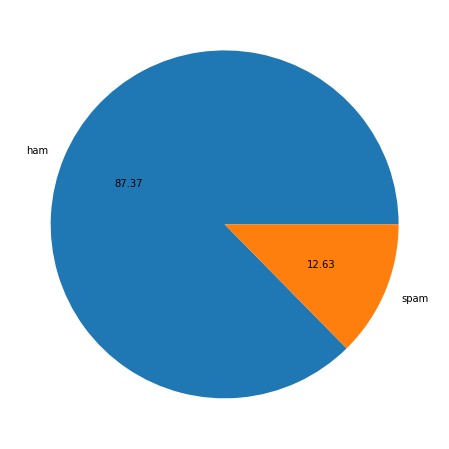

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Analyzing the text and adding the columns to the data

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
df['num_char']=df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df.describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [19]:
import seaborn as sns

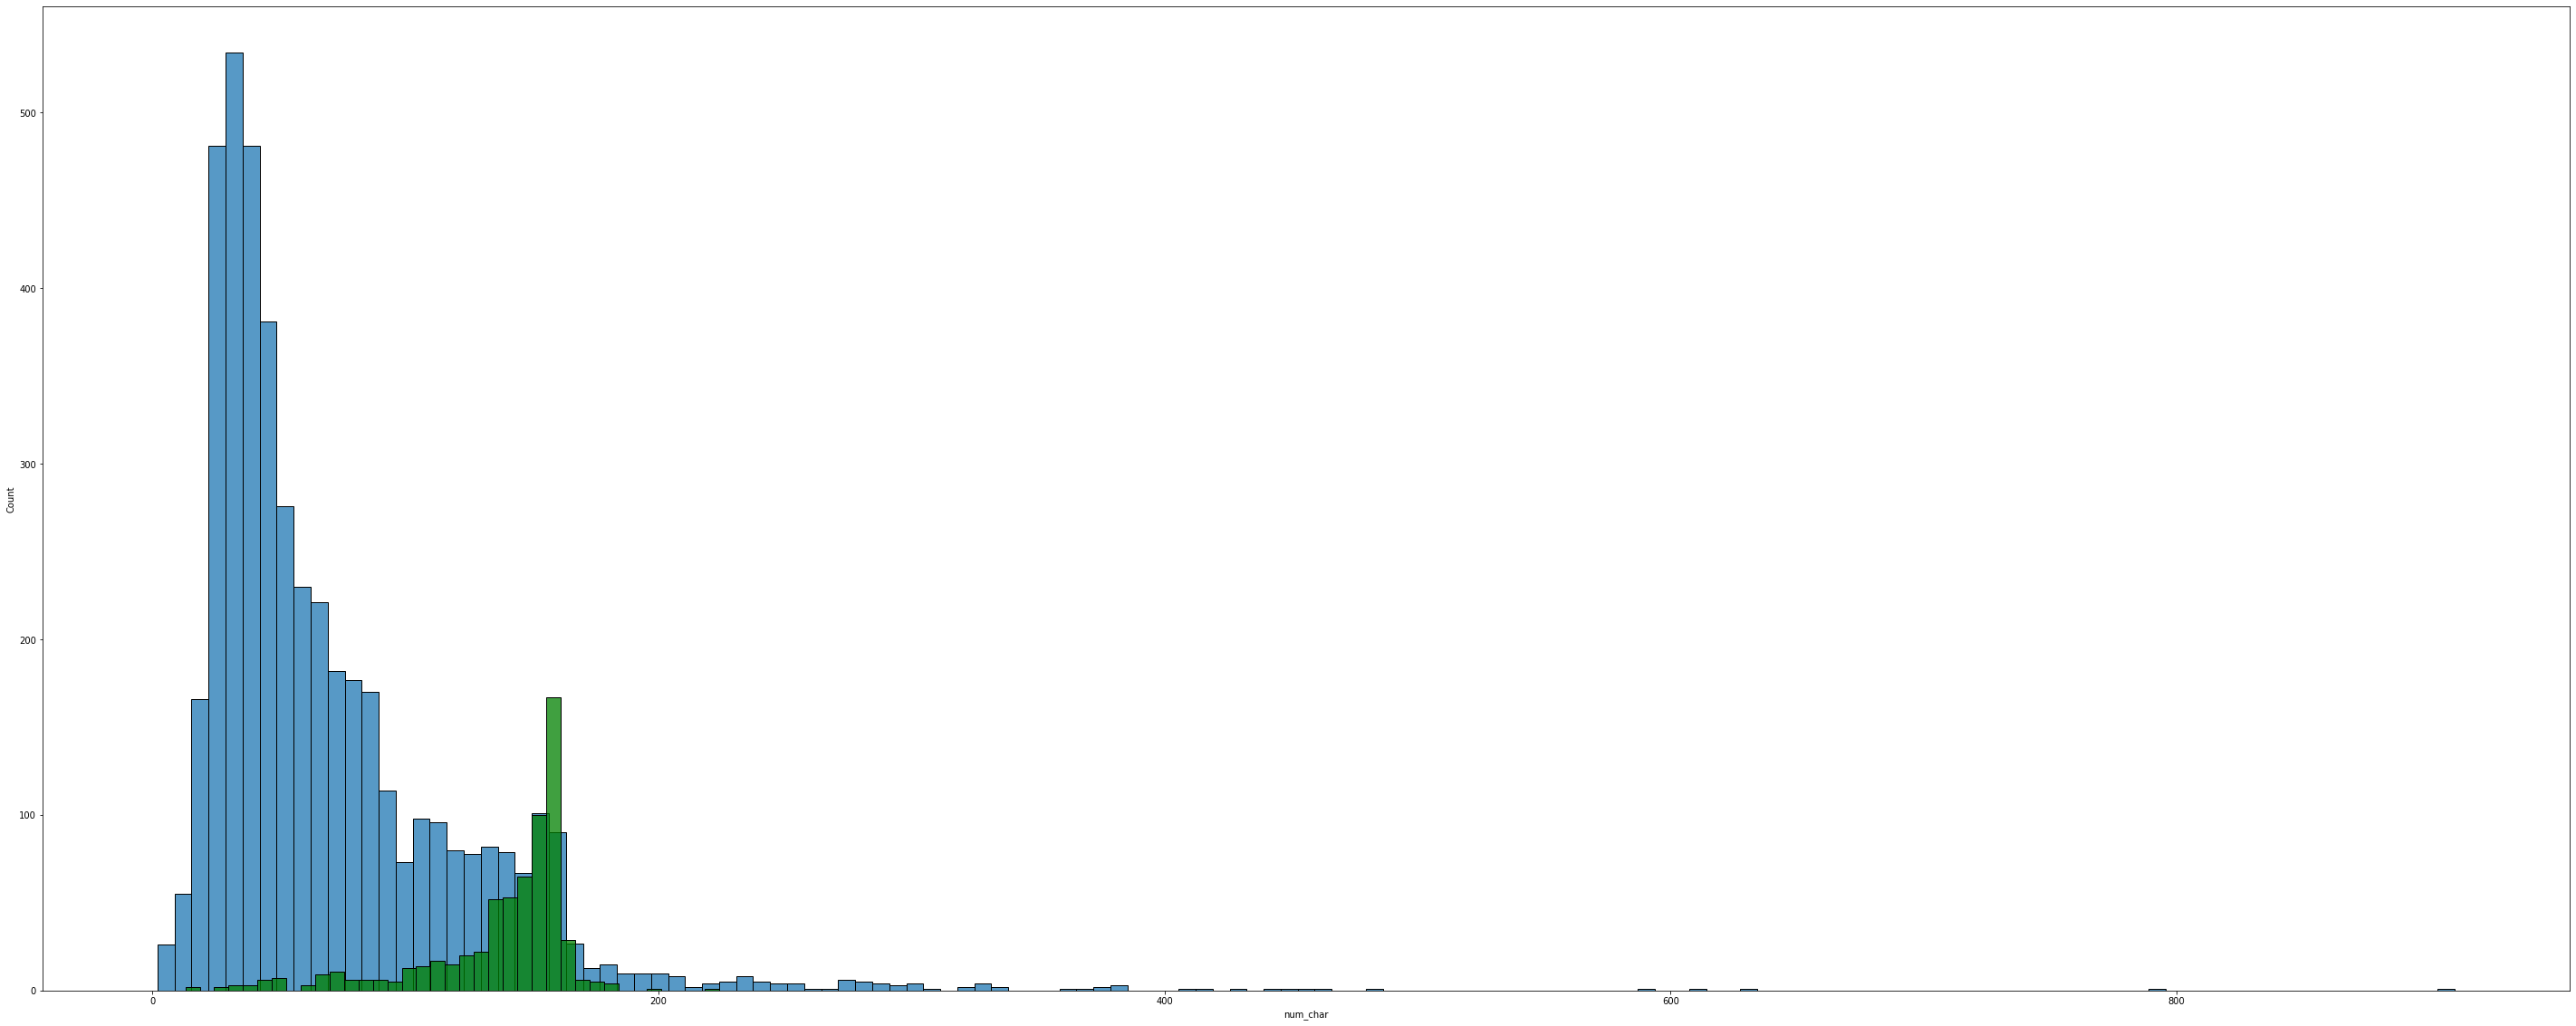

In [20]:
plt.figure(figsize=(50,20))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='green')

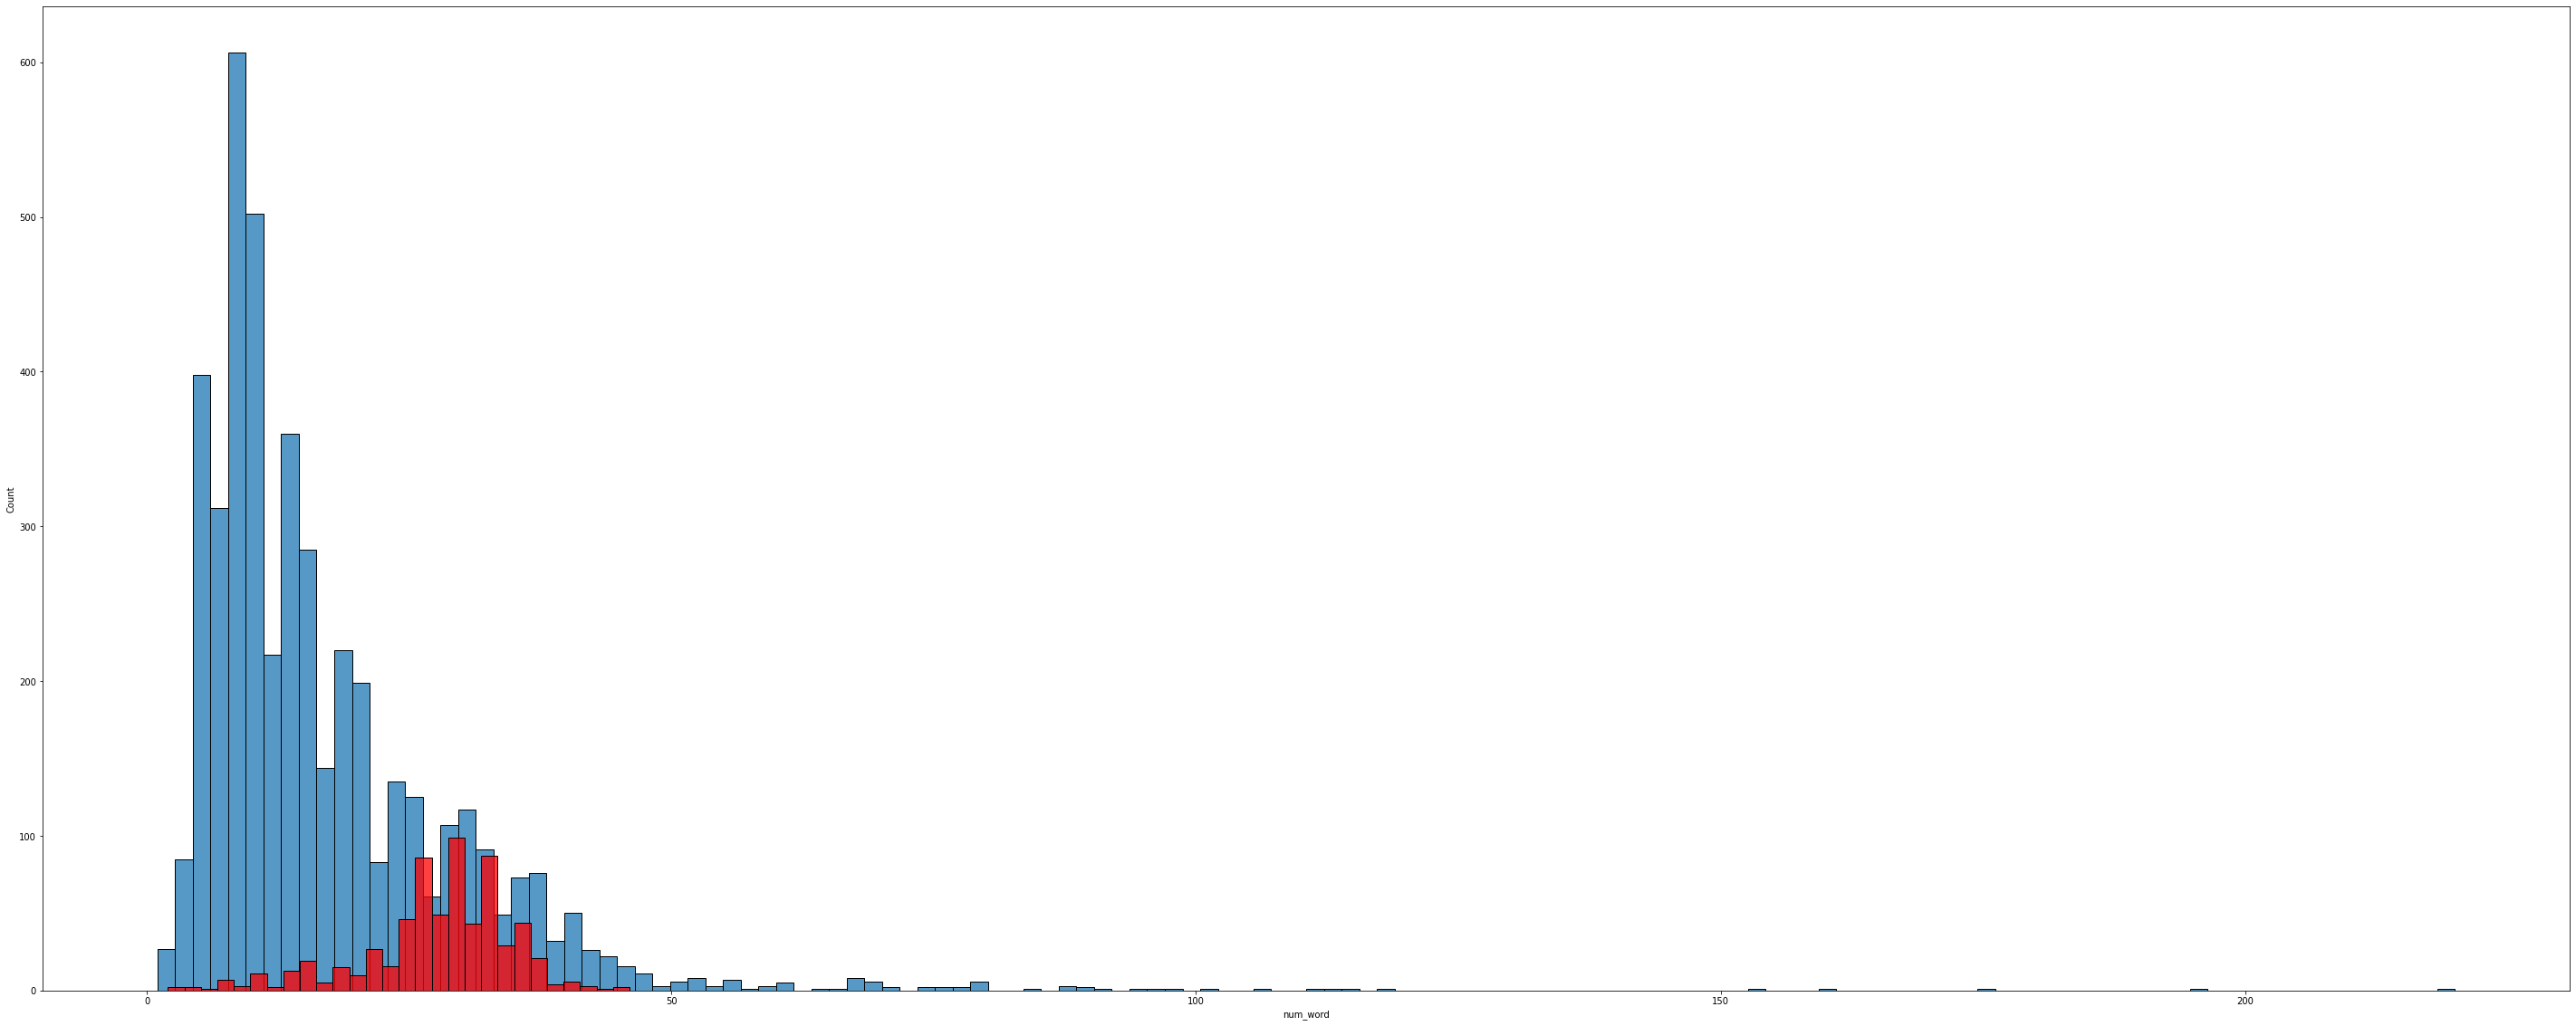

In [21]:
plt.figure(figsize=(50,20))
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

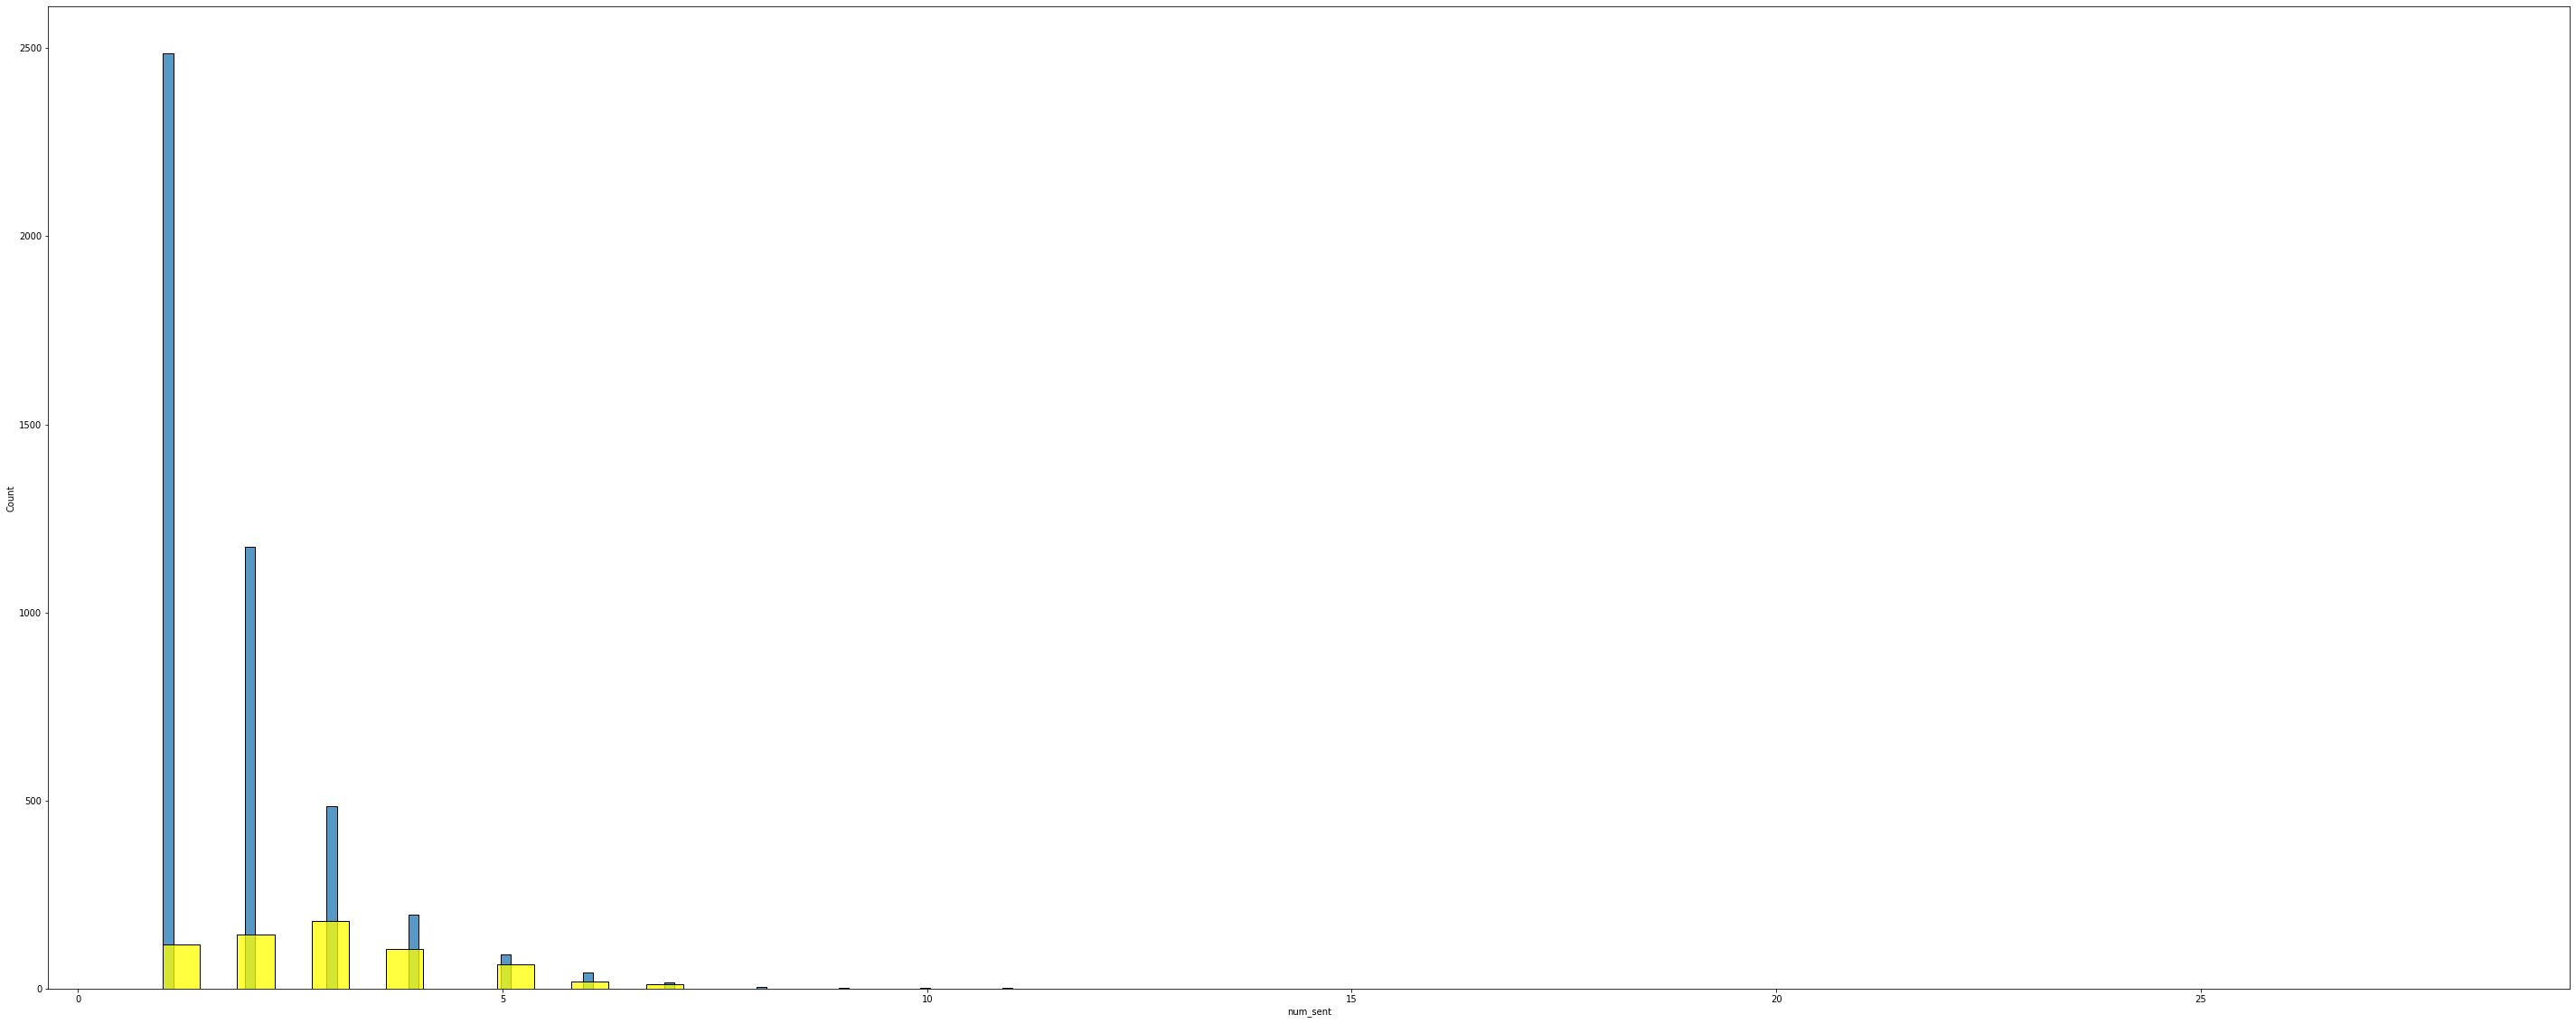

In [22]:
plt.figure(figsize=(50,20))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='yellow')

<Figure size 2160x1440 with 0 Axes>

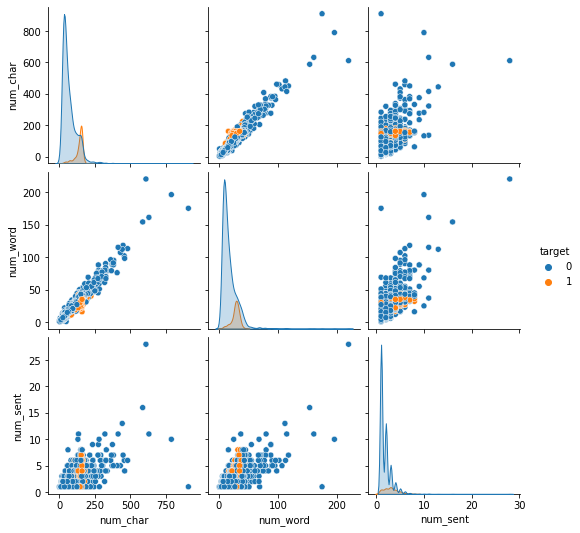

In [23]:
plt.figure(figsize=(30,20))
sns.pairplot(df,hue='target')

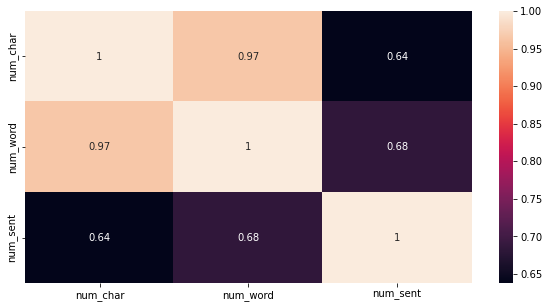

In [24]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True)

# Text Preprocessing

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# Lowering and Stemming the whole text, removing the stopwords and removing the numbers
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [27]:
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df['text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_word,num_sent
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2
3,0,u dun say earli hor u c alreadi say,49,13,1
4,0,nah think goe usf live around though,61,15,1


# Splitting the Data

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'], stratify=df['target'])

In [30]:
X_train

1321                    wake long ago alreadi dunno thing
5159                                        bluray player
4291                                                     
5041    jamster get free wallpap text heart 88888 c ap...
1419                     feel word better silenc gud mrng
                              ...                        
2393    okey doke home dress co lay around ill speak l...
4363                                               rememb
3409    joy father john john joy father u an th hav lt...
4822                                                     
2391                                  pick ur fone u dumb
Name: text, Length: 3876, dtype: object

In [31]:
X_train.shape

(3876,)

In [32]:
X_test

3610                                         meet librari
4622    u need presnt alway bcz u cant mi love irulina...
3697                                            catch put
328                                        cool text park
2883    cbe realli good nowaday lot shop showroom citi...
                              ...                        
4859                one power weapon 2 occupi place other
1917              leav yet ok lor go elsewher n eat u thk
1134      u wake alreadi thanx 4 e tau sar piah quit nice
2775                                 confirm eat esplanad
247                             kalli wont bat 2nd inning
Name: text, Length: 1293, dtype: object

In [33]:
X_test.shape

(1293,)

In [34]:
y_train.value_counts()

0    3386
1     490
Name: target, dtype: int64

In [35]:
y_test.value_counts()

0    1130
1     163
Name: target, dtype: int64

In [36]:
y_train = np.asarray(y_train).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)

<ipython-input-36-9a5b5ae23820>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_train = np.asarray(y_train).astype(np.int)
<ipython-input-36-9a5b5ae23820>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1

# Word Embeddings 

Using BERT Embeddings and Preprocess

In [37]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 39.5 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
import tensorflow_text as text

In [40]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# Building the Model

In [41]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [43]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

can't feed directly y_train

In [44]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
122/122 [==============================] - 49s 304ms/step - loss: 0.3361 - accuracy: 0.8731 - precision: 0.3750 - recall: 0.0061
Epoch 2/25
122/122 [==============================] - 39s 324ms/step - loss: 0.2516 - accuracy: 0.8904 - precision: 0.9221 - recall: 0.1449
Epoch 3/25
122/122 [==============================] - 42s 342ms/step - loss: 0.2230 - accuracy: 0.9128 - precision: 0.8800 - recall: 0.3592
Epoch 4/25
122/122 [==============================] - 40s 325ms/step - loss: 0.1971 - accuracy: 0.9278 - precision: 0.8918 - recall: 0.4878
Epoch 5/25
122/122 [==============================] - 40s 330ms/step - loss: 0.1854 - accuracy: 0.9334 - precision: 0.9028 - recall: 0.5306
Epoch 6/25
122/122 [==============================] - 40s 327ms/step - loss: 0.1726 - accuracy: 0.9401 - precision: 0.9031 - recall: 0.5898
Epoch 7/25
122/122 [==============================] - 40s 328ms/step - loss: 0.1632 - accuracy: 0.9484 - precision: 0.9119 - recall: 0.6551
Epoch 8/25
122/122 [

## Model Evaluation

In [45]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 14s 323ms/step - loss: 0.0961 - accuracy: 0.9667 - precision: 0.9545 - recall: 0.7730


[0.0961415097117424,
 0.9667440056800842,
 0.9545454382896423,
 0.7730061411857605]

## Prediction Generation

In [46]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

41/41 [==============================] - 16s 353ms/step


In [50]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

## Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[1124,    6],
       [  37,  126]])

Text(69.0, 0.5, 'Truth')

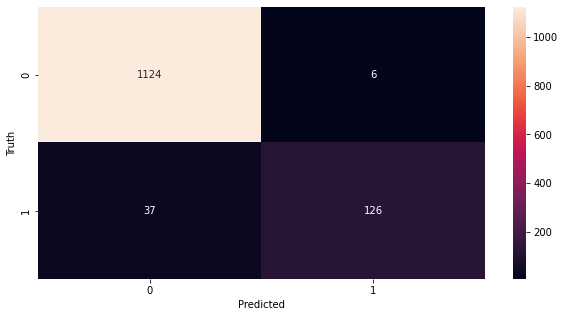

In [54]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1130
           1       0.95      0.77      0.85       163

    accuracy                           0.97      1293
   macro avg       0.96      0.88      0.92      1293
weighted avg       0.97      0.97      0.97      1293

